In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from utils import *


In [2]:
# Hyperparameters and paths

first_execution = False  # Set to True for the first execution to split the excel file

RAW = Path("data/raw/Observations_2012-2025.xlsx")
OUT_FILT = Path("data/filtered")
OUT_CLEAN = Path("data/cleaned")
OUT_DRAFT = Path("data/drafts")

sheets_to_csv_filtered = {
    "ESPECES": "especes.csv",
    "GPS-MILIEU": "gps_milieu.csv",
    "NOM FRANÇAIS": "observations.csv",
}

sheets_to_csv_cleaned = {
    "ESPECES": "especes_clean.csv",
    "GPS-MILIEU": "gps_milieu_clean.csv",
    "NOM FRANÇAIS": "nom_francais_clean.csv",
}


In [3]:
# Original sheets declaration : 

# Run on the first execution to split and save the excel file into multiple csv files
if first_execution:
    print(split_excel_to_csvs(RAW, OUT_FILT, sheets_to_csv_filtered))

# For following executions, load the csv files directly
dfs = load_csvs(OUT_FILT, sheets_to_csv_filtered)
for k, df in dfs.items():
    print(f"{k}: {df.shape}")


# Visual inspection of dataframes, uncoment as needed
# dfs['ESPECES'].head()
# dfs['GPS-MILIEU'].head()
# dfs['NOM FRANÇAIS'].head()

ESPECES: (86, 5)
GPS-MILIEU: (651, 8)
NOM FRANÇAIS: (114497, 26)


In [4]:
# Cleaned dataframes declaration 

if first_execution:
    # Cleaning dataframes from initial loading issues
    clean_especes = clean_especes(dfs["ESPECES"])
    clean_gps = clean_gps(dfs["GPS-MILIEU"])
    clean_nom_francais = clean_observations(dfs["NOM FRANÇAIS"])

    # Saving cleaned dataframes back to csv files
    save_clean_csvs({"ESPECES": clean_especes, "GPS-MILIEU": clean_gps, "NOM FRANÇAIS": clean_nom_francais}, OUT_CLEAN)

else:
    # Loading cleaned dataframes directly from csv files
    clean_dfs = load_csvs(OUT_CLEAN, sheets_to_csv_cleaned)
    clean_especes = clean_dfs["ESPECES"]
    clean_gps = clean_dfs["GPS-MILIEU"]
    clean_nom_francais = clean_dfs["NOM FRANÇAIS"]

# uncomment as needed to inspect cleaned dataframes
# clean_especes.head()
# clean_gps.head()
# clean_nom_francais.head()

In [5]:
clean_especes.head()

,ESPECIES_NAME,LATIN_NAME,NATURE
0,Aigrette bleue,Egretta caerulea,Migrateur
1,Aigrette garzette,Egretta garzetta,Migrateur
2,Aigrette neigeuse,Egretta thula,Migrateur
3,Aigrette tricolore,Egretta tricolor ruficollis,Migrateur
4,Amazone aourou,Amazona amazonica,Exogène introduit par l'homme


## Dataset orientation summaries

In [6]:
print("Data orientation summaries : ")
print(f"- Especes : {clean_especes.shape}")
print(f"- GPS : {clean_gps.shape}")
print(f"- Nom Français : {clean_nom_francais.shape}")

Data orientation summaries : 
- Especes : (87, 3)
- GPS : (650, 6)
- Nom Français : (114495, 26)


---

## Especes : 

In [16]:
df = clean_especes.copy()

# Basic structure and uniqueness check ------------------------------------
print("Number of species:", len(df))
print("Unique ESPECIES_NAME:", df["ESPECIES_NAME"].nunique())
print("Unique LATIN_NAME:", df["LATIN_NAME"].nunique())

# Check for duplicates
dup_species = df[df["ESPECIES_NAME"].duplicated(keep=False)].sort_values("ESPECIES_NAME")
dup_latin   = df[df["LATIN_NAME"].duplicated(keep=False)].sort_values("LATIN_NAME")

print("Duplicated:")
display(dup_species)


Number of species: 87
Unique ESPECIES_NAME: 86
Unique LATIN_NAME: 86
Duplicated:


,ESPECIES_NAME,LATIN_NAME,NATURE
7,Astrild ondulé,Estrilda astrild,Exogène introduit par l'homme
8,Astrild ondulé,Estrilda astrild,Exogène introduit par l'homme


In [28]:
# "Families" aer defined by a shared root ------------------------------------
df["ESPECIES_FAMILY"] = df["ESPECIES_NAME"].str.split().str[0]
df["LATIN_FAMILY"] = df["LATIN_NAME"].str.split().str[0]

# Count distinct families
especies_families = df["ESPECIES_FAMILY"].value_counts().reset_index()
especies_families.columns = ["ESPECIES_FAMILY", "N_ESPECIES"]

latin_families = df["LATIN_FAMILY"].value_counts().reset_index()
latin_families.columns = ["LATIN_FAMILY", "N_SPECIES"]


print(f"Number of families (especies): ", especies_families['ESPECIES_FAMILY'].nunique())
print(f"Number of families (latin): ", latin_families['LATIN_FAMILY'].nunique())

print("Top 10 families (by French names):,") 
display(especies_families.head(10))
print("Top 10 families (by Latin names):")
display(latin_families.head(20))


Number of families (especies):  53
Number of families (latin):  71
Top 10 families (by French names):,


,ESPECIES_FAMILY,N_ESPECIES
0,Aigrette,4
1,Astrild,4
2,Colibri,4
3,Chevalier,4
4,Moqueur,4
5,Sterne,4
6,Sporophile,3
7,Hirondelle,3
8,Tourterelle,3
9,Colombe,3


Top 10 families (by Latin names):


,LATIN_FAMILY,N_SPECIES
0,Egretta,4
1,Estrilda,4
2,Tringa,3
3,Falco,3
4,Eulampis,2
5,Lonchura,2
6,Geotrygon,2
7,Onychoprion,2
8,Ardea,2
9,Zenaida,2


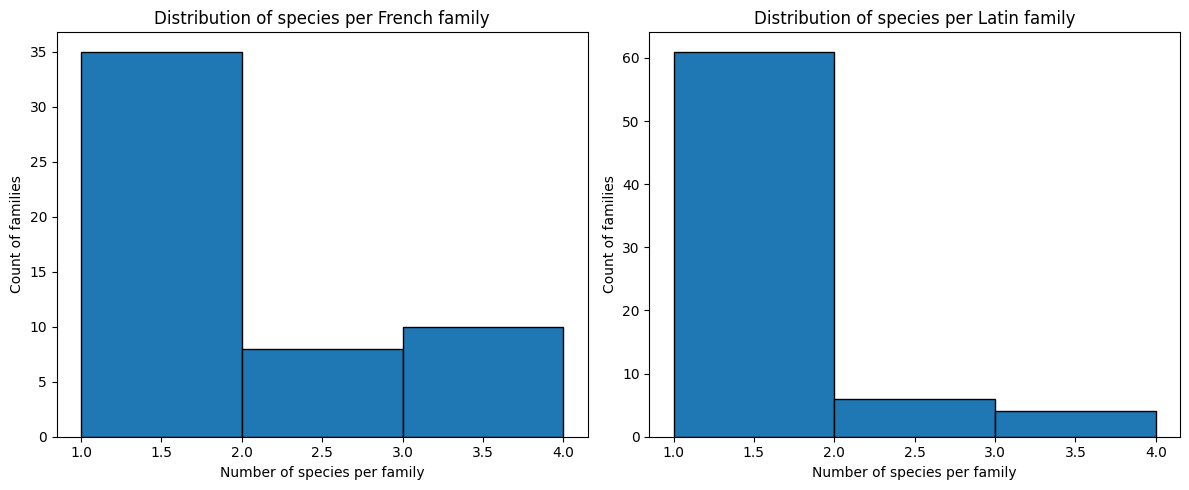

In [ ]:
# Plot distribution of family sizes ------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(especies_families["N_SPECIES"], bins=range(1, especies_families["N_SPECIES"].max()+1), edgecolor='black')
axes[0].set_title("Distribution of species per French family")
axes[0].set_xlabel("Number of species per family")
axes[0].set_ylabel("Count of families")

axes[1].hist(latin_families["N_SPECIES"], bins=range(1, latin_families["N_SPECIES"].max()+1), edgecolor='black')
axes[1].set_title("Distribution of species per Latin family")
axes[1].set_xlabel("Number of species per family")
axes[1].set_ylabel("Count of families")
plt.tight_layout()
plt.show()



Distinct NATURE values:
NATURE
Migrateur                         24
Autochtone                        19
Exogène introduit par l'homme     15
Endémique des Petites Antilles    13
Marin                              8
Exogène colonisateur naturel       4
Endémique de la Martinique         2
Migrateur rare                     1
Name: count, dtype: int64
Nature distribution per family:


,ESPECIES_FAMILY,NATURE,count
0,Aigrette,Migrateur,4
1,Amazone,Exogène introduit par l'homme,1
2,Astrild,Exogène introduit par l'homme,3
3,Balbuzard,Migrateur,1
4,Bengali,Exogène introduit par l'homme,1
5,Bihoreau,Autochtone,1
6,Bihoreau,Migrateur,1
7,Bécasseau,Migrateur,1
8,Canard,Exogène introduit par l'homme,1
9,Capucin,Exogène introduit par l'homme,2


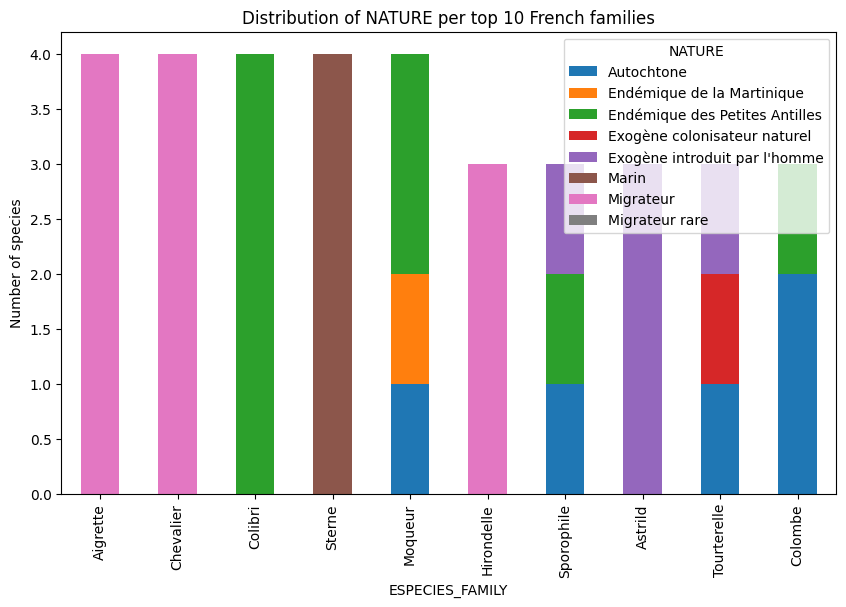

In [35]:
# NATURE analysis ------------------------------------
print("Distinct NATURE values:")
print(df["NATURE"].value_counts())

# Distribution of NATURE per family ------------------------------------
nature_by_family = (
    df.groupby(["ESPECIES_FAMILY", "NATURE"])
      .size()
      .reset_index(name="count")
)

print("Nature distribution per family:")
display(nature_by_family.sort_values(["ESPECIES_FAMILY", "count"], ascending=[True, False]).head(10))

# Pivot to make a clearer table
nature_pivot = nature_by_family.pivot_table(
    index="ESPECIES_FAMILY", columns="NATURE", values="count", fill_value=0
).astype(int)

# Plot top 10 families by total species
top_fams = nature_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
nature_pivot.loc[top_fams].plot(
    kind="bar", stacked=True, figsize=(10, 6),
    title="Distribution of NATURE per top 10 French families"
)
plt.ylabel("Number of species")
plt.show()


#### Key insights for the ESPECES table :

TBD 

---

- GPS :

In [ ]:
df = clean_gps.copy()

# Count distinct habitat types ------------------------------------
n_habitats = df["HABITAT_TYPE"].nunique()
print(f"Number of distinct habitat types: {n_habitats}")
print("Habitat types frequency:")
print(df["HABITAT_TYPE"].value_counts())

# Link habitat types to unique transect names ------------------------------------
# Remove duplicates so that each (habitat, transect_name) pair appears only once
habitat_transect = (
    df[["HABITAT_TYPE", "TRANSECT_NAME"]]
    .drop_duplicates()
    .sort_values(["HABITAT_TYPE", "TRANSECT_NAME"])
)

# For each habitat type, list unique transects
habitat_to_transects = (
    habitat_transect.groupby("HABITAT_TYPE")["TRANSECT_NAME"]
    .apply(list)
    .to_dict()
)

# Display summary ------------------------------------
print("Habitat type → number of unique transects:")
for habitat, transects in habitat_to_transects.items():
    print(f"- {habitat}: {len(transects)} transects")


Number of distinct habitat types: 7
Habitat types frequency:
HABITAT_TYPE
Forêt sèche     186
Agricole        134
Forêt humide    130
Périurbain      120
Mangrove         30
Plage            30
Urbain           20
Name: count, dtype: int64
Habitat type → number of unique transects:
- Agricole: 14 transects
- Forêt humide: 13 transects
- Forêt sèche: 19 transects
- Mangrove: 3 transects
- Plage: 3 transects
- Périurbain: 12 transects
- Urbain: 2 transects

Agricole (14 transects):
['Bois Pothau', 'Canal Cocotte', 'Cap Est', 'Carrère', 'Fonds Préville', 'Galion', 'Galion 2', 'Génipa', 'Habitation Petite Rivière', 'Hôtel des Plaisirs', 'Lafayette', 'Morne Babet', 'Moulin à Vent', 'Verrier']

Forêt humide (13 transects):
['Anse Couleuvre', 'Bois La Charles', 'Bouliki', "Domaine d'Emeraude", 'Fond Baron', "Fond l'Etang", 'Forêt Montravail', 'Forêt la Reculée', 'La Démarche 2', "Rivière l'Or", 'Route Forestière de Palourde', 'Tunnel Didier', 'Tunnel Didier 2']

Forêt sèche (19 transects):
['

In [46]:
print(70*"=")
# Optional: show a few examples
for habitat, transects in list(habitat_to_transects.items()):
    print(f"\n{habitat} ({len(transects)} transects):")
    print(transects)

# make a summary DataFrame and plot ------------------------------------
habitat_summary = (
    pd.DataFrame({
        "HABITAT_TYPE": list(habitat_to_transects.keys()),
        "N_TRANSECTS": [len(v) for v in habitat_to_transects.values()]
    })
    .sort_values("N_TRANSECTS", ascending=False)
)


Agricole (14 transects):
['Bois Pothau', 'Canal Cocotte', 'Cap Est', 'Carrère', 'Fonds Préville', 'Galion', 'Galion 2', 'Génipa', 'Habitation Petite Rivière', 'Hôtel des Plaisirs', 'Lafayette', 'Morne Babet', 'Moulin à Vent', 'Verrier']

Forêt humide (13 transects):
['Anse Couleuvre', 'Bois La Charles', 'Bouliki', "Domaine d'Emeraude", 'Fond Baron', "Fond l'Etang", 'Forêt Montravail', 'Forêt la Reculée', 'La Démarche 2', "Rivière l'Or", 'Route Forestière de Palourde', 'Tunnel Didier', 'Tunnel Didier 2']

Forêt sèche (19 transects):
['Anse Mathurin', 'Blin', 'Bois Pothau', 'Forêt Vatable', 'Forêt Vatable 2', 'Forêt la Philippe', 'Ilets du François', 'Ilets du Robert', 'Le Phare-Caravelle', 'Morne Bellevue', 'Morne Gardier', 'Petit Sentier RNC', 'Piton Crève-cœur', 'Pointe Banane', 'Pointe Jean-Claude', 'Pointe La Rose', 'Pointe Lynch', 'Pointe Rouge', 'Rocher Leclerc']

Mangrove (3 transects):
['Aéroport', 'Boucle du Vauclin', 'Morne Cabri']

Plage (3 transects):
['Anse Meunier', 'Autr

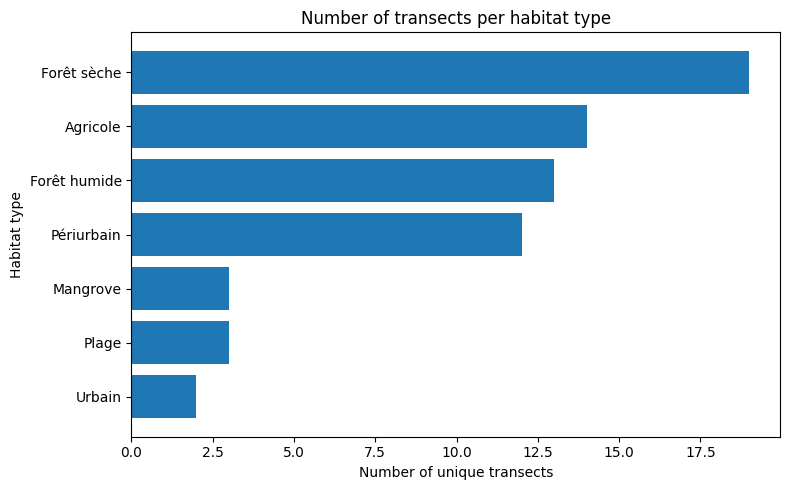

In [39]:
# Bar plot: how many transects per habitat type

plt.figure(figsize=(8, 5))
plt.barh(habitat_summary["HABITAT_TYPE"], habitat_summary["N_TRANSECTS"])
plt.xlabel("Number of unique transects")
plt.ylabel("Habitat type")
plt.title("Number of transects per habitat type")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Key insights for the GPS-MILIEU table :

TBD 

---

### Nom Français : 

#### Key insights for the NOM_FRANÇAIS table :

TBD 